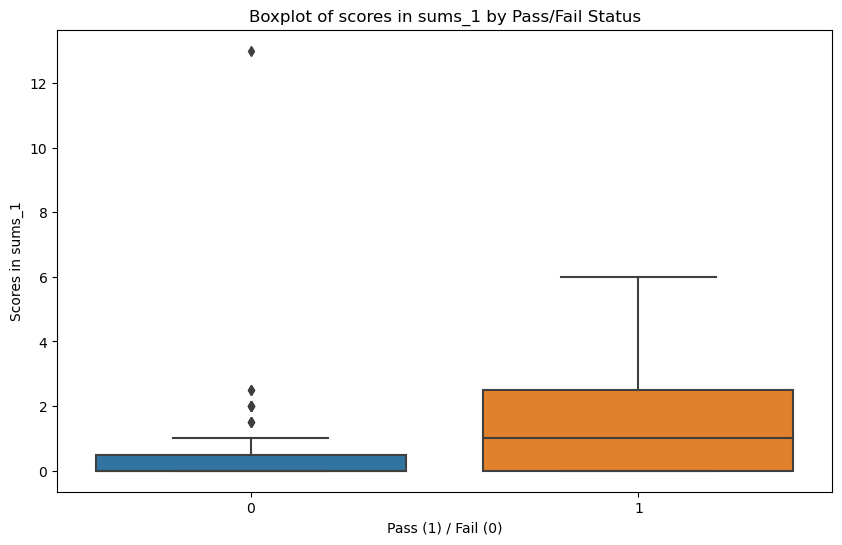

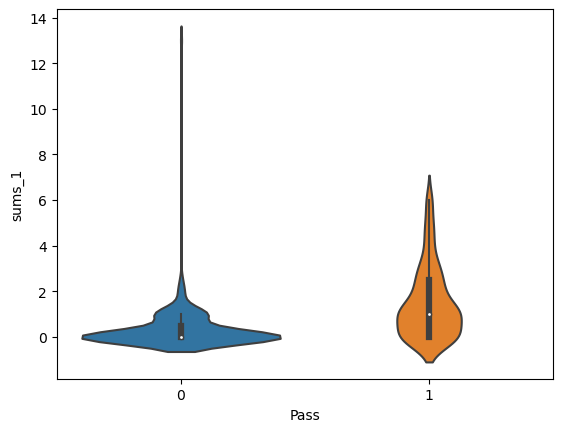

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it already includes 'Pass' as a binary indicator (0 = fail, 1 = pass)
# and 'sums_1' as the scores for the first subject.
# Load your data
data = pd.read_excel('C:/Users/Prachi/Documents/Data Science Masters/Thesis/student_score_per_topic_with_total.xlsx')

# Convert all score columns to numeric (assuming score columns are named 'Score1', 'Score2', ...)
score_columns = [col for col in data.columns if 'sums' in col]
data[score_columns] = data[score_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean (or zero, or median)
data[score_columns] = data[score_columns].fillna(data[score_columns].mean())

# Create a binary 'Pass' column based on the passing percentage, e.g., 40%
passing_score = 34
data['Pass'] = (data['total'] >= passing_score).astype(int)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pass', y='sums_1', data=data)
plt.title('Boxplot of scores in sums_1 by Pass/Fail Status')
plt.xlabel('Pass (1) / Fail (0)')
plt.ylabel('Scores in sums_1')
plt.show()

# You can also use a violin plot to see the distribution more clearly
sns.violinplot(x='Pass', y='sums_1', data=data)
plt.show()


In [3]:
from scipy.stats import ttest_ind

# Split the data into pass and fail groups
pass_group = data[data['Pass'] == 1]['sums_1']
fail_group = data[data['Pass'] == 0]['sums_1']

# Perform a t-test between the groups
t_stat, p_value = ttest_ind(pass_group, fail_group, equal_var=False)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in sums_1 scores between pass and fail groups.")
else:
    print("There is no statistically significant difference in sums_1 scores between pass and fail groups.")


T-test result: t-statistic = 9.333685557156373, p-value = 2.0695671504601612e-18
There is a statistically significant difference in sums_1 scores between pass and fail groups.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for logistic regression
X = data[['sums_1']]  # Using only sums_1 as the predictor
y = data['Pass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of logistic regression model using only sums_1: {accuracy}")
print(classification_report(y_test, predictions))


Accuracy of logistic regression model using only sums_1: 0.6555555555555556
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        46
           1       0.88      0.34      0.49        44

    accuracy                           0.66        90
   macro avg       0.74      0.65      0.62        90
weighted avg       0.74      0.66      0.62        90



In [5]:
# Look at the coefficient for sums_1 in the logistic regression model
coefficient = model.coef_[0][0]
print(f"Coefficient for sums_1: {coefficient}")


Coefficient for sums_1: 0.9401229049040347
